In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

In [2]:
# sigma_x = sp.Symbol(r'\sigma_x', nonnegative = True)
# sigma_y = sp.Symbol(r'\sigma_y', nonnegative = True)
# T = sp.Symbol('T', nonnegative = True)
# c_t, s_t = sp.symbols('c_t, s_t', nonnegative = True)

In [3]:
# sigma_ij = sp.Matrix([[sigma_x, 0],
#                      [0, sigma_y + T]])
# sigma_ij

In [4]:
# R = sp.Matrix([[c_t, -s_t],
#                      [s_t, c_t]])
# R

In [5]:
# R.T * sigma_ij * R

In [6]:
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma =  sp.Symbol(r'\sigma', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
r = sp.Symbol('r', nonnegative = True)

In [7]:
s_b, c_b = sp.symbols('s_b, c_b')

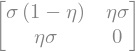

In [8]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma, eta * sigma],
                     [eta * sigma, 0]])
sigma_ij

In [9]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])

In [10]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta

In [11]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)

In [12]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I

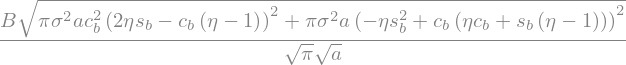

In [13]:
B = sp.Symbol('B', nonnegative = True)
K_eff = sp.sqrt(K_I**2 + K_II**2)
T = sigma_beta_ij_sim_[0,0] - sigma_beta_ij_sim_[1,1] # 1,1 - 0,0
T = B * K_eff * (1/(sp.sqrt(sp.pi * a)))
T

In [14]:
s_t, c_t = sp.symbols('s_t,c_t')

In [15]:
cs_theta = sp.Matrix([c_t, s_t])

In [16]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])

In [17]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)

In [18]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)

In [19]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)

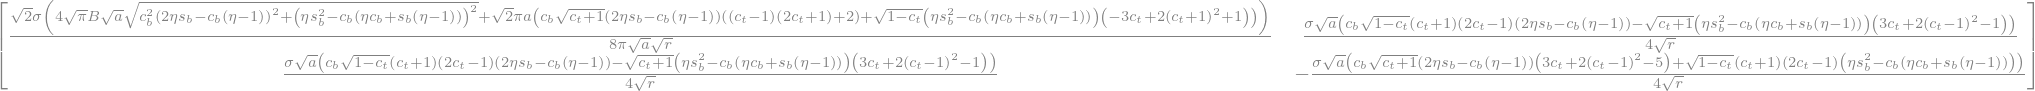

In [27]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0] + T, K_I * S_I_[0,1] + K_II * S_II_[0,1] ],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h)) / sp.sqrt(2 * sp.pi * r)
sigma_tip_ij_

In [28]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])

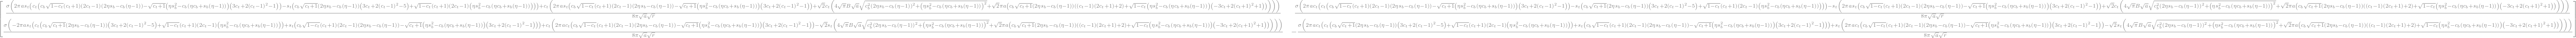

In [29]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_

In [30]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)

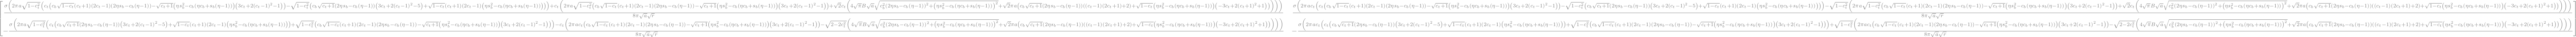

In [31]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim

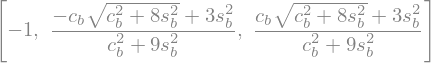

In [32]:
params = {eta : 0, B : 0}
cos_theta_sigma_tension = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
cos_theta_sigma_tension

In [34]:
params = {eta : 0, B: 0.5}
cos_theta_sigma_tension_t1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
cos_theta_sigma_tension_t1

In [33]:
# params = {eta : 0, T: -1}
# cos_theta_sigma_tension_tm1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
# cos_theta_sigma_tension_tm1

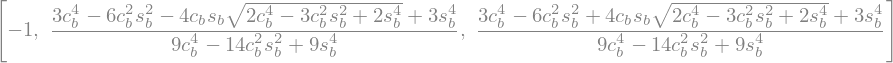

In [35]:
params_ = {eta : 1, B: 0} 
cos_theta_sigma_pure_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
cos_theta_sigma_pure_shear

In [36]:
params_ = {eta : 1, B:-1} 
cos_theta_sigma_pure_shear_t1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
cos_theta_sigma_pure_shear_t1

In [36]:
# params_ = {eta : 1,} 
# cos_theta_sigma_pure_shear_tm1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
# cos_theta_sigma_pure_shear_tm1

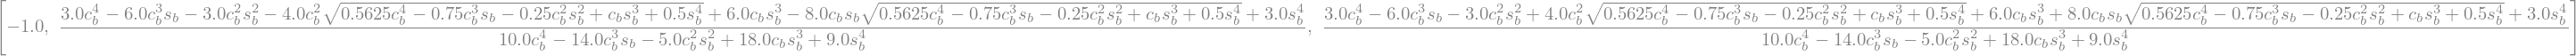

In [37]:
params_ = {eta : 0.5} 
cos_theta_sigma_tension_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
cos_theta_sigma_tension_shear

In [38]:
theta_pure_tension = cos_theta_sigma_tension[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_pt = sp.acos(theta_pure_tension)
get_theta_sig_pt = sp.lambdify((beta), theta_pt, 'numpy')

In [39]:
theta_pure_shear = cos_theta_sigma_pure_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ps = sp.acos(theta_pure_shear)
get_theta_sig_ps = sp.lambdify((beta), theta_sig_ps, 'numpy')

In [40]:
theta_sig_tension_shear = cos_theta_sigma_tension_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ts = sp.acos(theta_sig_tension_shear)
get_theta_sig_ts = sp.lambdify((beta), theta_sig_ts, 'numpy')

<IPython.core.display.Javascript object>


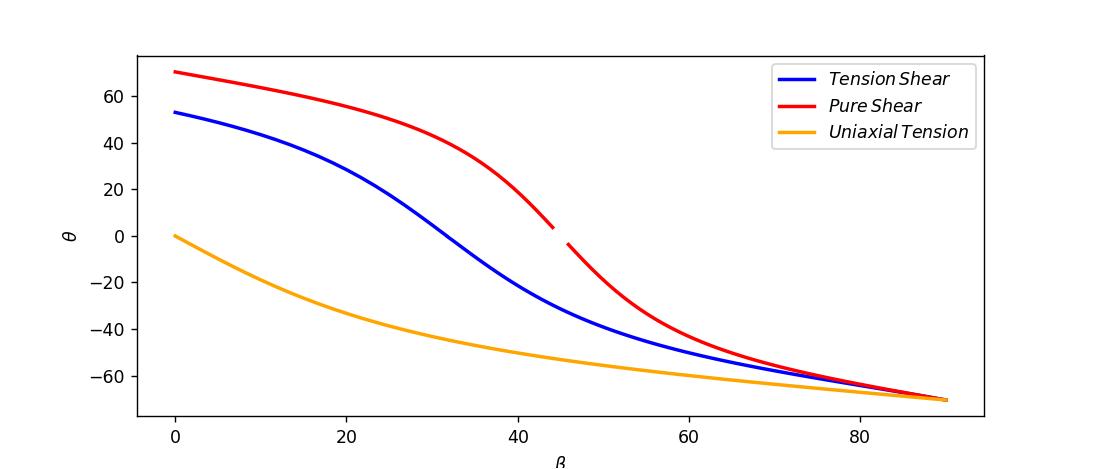

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in arccos
  return (arccos((4*sqrt(2*sin(Dummy_383)**4 - 3*sin(Dummy_383)**2*cos(Dummy_383)**2 + 2*cos(Dummy_383)**4)*sin(Dummy_383)*cos(Dummy_383) + 3*sin(Dummy_383)**4 - 6*sin(Dummy_383)**2*cos(Dummy_383)**2 + 3*cos(Dummy_383)**4)/(9*sin(Dummy_383)**4 - 14*sin(Dummy_383)**2*cos(Dummy_383)**2 + 9*cos(Dummy_383)**4)))


In [41]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_pt_0 = np.linspace(-90 * np.pi/180, 0 * np.pi/180, 50)
beta_pt_1 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 50)
beta_pt = np.concatenate((beta_pt_0, beta_pt_1  ))
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts  ))
theta_sig_pt_0 = get_theta_sig_pt(beta_pt_0)
theta_sig_pt_1 = -get_theta_sig_pt(beta_pt_1)
theta_sig_pt = np.concatenate((theta_sig_pt_0, theta_sig_pt_1  ))
theta_sig_pt = -get_theta_sig_pt(beta_ts)
beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
theta_sig_ps_1 = get_theta_sig_ps(beta_0_ps)
theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_0_ts)
theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
ax1.plot(beta_ts * 180/np.pi, theta_sig_ts_fin * 180/ np.pi, color='blue', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ps * 180/np.pi, theta_sig_ps_fin * 180/ np.pi, color='red', lw=2, label = r'$Pure\,Shear$')
ax1.plot(beta_ts * 180/np.pi, theta_sig_pt * 180/ np.pi, color='orange', lw=2, label = r'$Uniaxial\,Tension$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
#_.savefig("crackpropagationagainstinclination.pdf", bbox_inches='tight')

In [42]:
theta_sig_pt * 180/ np.pi

array([ -0.        ,  -3.33120232,  -6.62901732,  -9.86223431,
       -13.00364728, -16.03128635, -18.9289621 , -21.68618266,
       -24.29760309, -26.76219942, -29.08234186, -31.26289542,
       -33.31042545, -35.23254262, -37.03739211, -38.73327434,
       -40.32837661, -41.83059316, -43.24741283, -44.58585644,
       -44.58585644, -45.15458787, -45.70980206, -46.25201352,
       -46.78171807, -47.29939318, -47.80549842, -48.30047587,
       -48.78475066, -49.25873146, -49.72281105, -50.17736682,
       -50.6227614 , -51.05934315, -51.48744675, -51.90739373,
       -52.31949301, -52.72404143, -53.12132425, -53.51161564,
       -53.89517921, -54.2722684 , -54.64312699, -55.00798952,
       -55.3670817 , -55.72062078, -56.06881602, -56.41186898,
       -56.74997391, -57.08331807, -57.41208209, -57.73644024,
       -58.05656076, -58.37260613, -58.68473333, -58.99309414,
       -59.29783534, -59.599099  , -59.89702265, -60.19173956,
       -60.48337889, -60.77206593, -61.05792229, -61.34

In [43]:
beta_ts * 180/np.pi

array([ 0.        ,  1.66842105,  3.33684211,  5.00526316,  6.67368421,
        8.34210526, 10.01052632, 11.67894737, 13.34736842, 15.01578947,
       16.68421053, 18.35263158, 20.02105263, 21.68947368, 23.35789474,
       25.02631579, 26.69473684, 28.36315789, 30.03157895, 31.7       ,
       31.7       , 32.43797468, 33.17594937, 33.91392405, 34.65189873,
       35.38987342, 36.1278481 , 36.86582278, 37.60379747, 38.34177215,
       39.07974684, 39.81772152, 40.5556962 , 41.29367089, 42.03164557,
       42.76962025, 43.50759494, 44.24556962, 44.9835443 , 45.72151899,
       46.45949367, 47.19746835, 47.93544304, 48.67341772, 49.41139241,
       50.14936709, 50.88734177, 51.62531646, 52.36329114, 53.10126582,
       53.83924051, 54.57721519, 55.31518987, 56.05316456, 56.79113924,
       57.52911392, 58.26708861, 59.00506329, 59.74303797, 60.48101266,
       61.21898734, 61.95696203, 62.69493671, 63.43291139, 64.17088608,
       64.90886076, 65.64683544, 66.38481013, 67.12278481, 67.86